###### Credit Card Defaults
** Data Points :
 Data set contains 10000 records associated with credit cards accounts.**
- Defualt : Indicates whether credit card holder defualted or not.
- Student : If holder is a student.
- Balance : Card holders current outstanding balance.
- Income  : Income of the card holder.



In [1]:
%pylab inline
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [12]:
default=pd.read_csv("Data/Default.csv")
default.head()
default.describe()

,default,balance,income
count,10000.000000,10000.000000,10000.000000
mean,0.033300,835.374886,33516.981876
std,0.179428,483.714985,13336.639563
min,0.000000,0.000000,771.967729
25%,0.000000,481.731105,21340.462905
50%,0.000000,823.636973,34552.644800
75%,0.000000,1166.308387,43807.729275
max,1.000000,2654.322576,73554.233500


* Split data into train and test data

In [13]:
from sklearn.cross_validation import train_test_split

In [15]:
train, test = train_test_split(default, test_size=0.33, random_state=1)

In [21]:
# Converting data into the dataframe
train = pd.DataFrame(data=train, columns=default.columns)
test = pd.DataFrame(data=test, columns=default.columns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0bce8c160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd0bcc4e6a0>]], dtype=object)

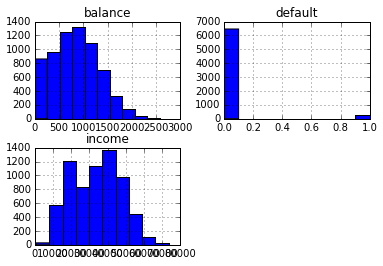

In [20]:
train.hist()

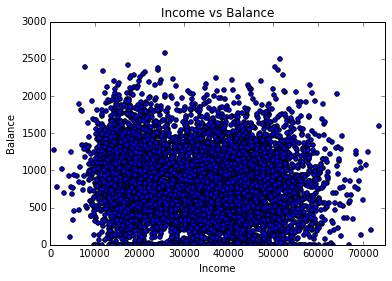

In [27]:
plt.scatter(train.income, train.balance)
plt.xlim(0, 75000)
plt.ylim(0, 3000)
plt.xlabel('Income')
plt.ylabel('Balance')
plt.title('Income vs Balance')

(0, 3000)

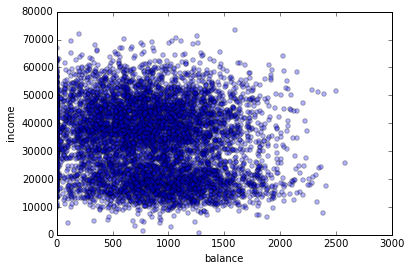

In [60]:
train.plot(x='balance', y='income', kind='scatter', alpha=0.3)
plt.ylim([0,80000])
plt.xlim([0,3000])


In [61]:
train_default=train[train.default==1]
train_no_default=train[train.default==0]

In [62]:
plt.figure()

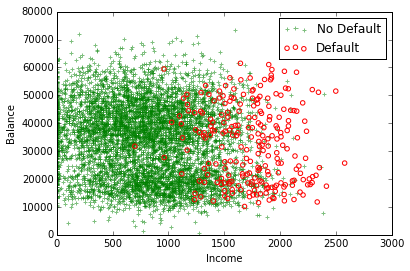

In [63]:
plt.scatter(train_no_default.balance, train_no_default.income, alpha=0.5, marker='+', c='g')
plt.scatter(train_default.balance, train_default.income, marker='o', edgecolors = 'r', facecolors = 'none')
plt.legend( ('No Default', 'Default'), loc='upper right')
plt.ylim([0,80000])
plt.xlim([0,3000])
plt.xlabel('Income')
plt.ylabel('Balance')

Plot the same graph differently

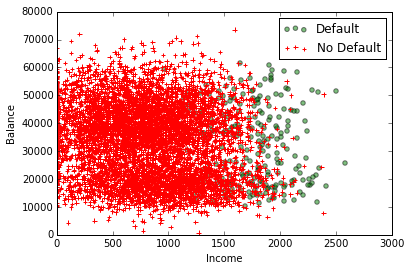

In [64]:
plt.scatter(train_default.balance, train_default.income, alpha=0.5, marker='o', c='g')
plt.scatter(train_no_default.balance, train_no_default.income, marker='+', edgecolors = 'r', facecolors = 'none')
plt.legend( ('Default', 'No Default'), loc='upper right')
plt.ylim([0,80000])
plt.xlim([0,3000])
plt.xlabel('Income')
plt.ylabel('Balance')

#### Conclusion
- Balace is more closely related to the default rate.

=============================================
            Logistic Regreassion 
=============================================

In [68]:
# Logistic regression on the balance variable
bal = smf.logit(formula='default ~ balance', data=train).fit()
bal.summary()

Optimization terminated successfully.
         Current function value: 0.080930
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 6700
Model:                          Logit   Df Residuals:                     6698
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Sep 2015   Pseudo R-squ.:                  0.4639
Time:                        21:25:05   Log-Likelihood:                -542.23
converged:                       True   LL-Null:                       -1011.5
                                        LLR p-value:                4.096e-206
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -10.8119      0.444    -24.348      0.000       -11.682    -9.942
balance        0.0057      0.000     20.752      0.000         0.005     0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [134]:
# Get confidence interval.
bal.conf_int()

,0,1
Intercept,-11.682211,-9.941545
balance,0.005122,0.006190


In [122]:
# odds ratio or Beta
# http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm
np.exp(bal.params.balance)

1.005672015611671

* Various probability of defualt based on the balance.

In [123]:
prob = bal.predict({'balance': [1200, 2000]})
print (prob)

[ 0.01755528  0.62248346]


In [124]:
bal.predict({'balance': 1900})

array([ 0.48363176])

In [125]:
x = np.linspace(test.balance.min(), test.balance.max(), 500)
betas = [bal.params.Intercept, bal.params.balance]

In [126]:
y = np.exp(betas[0] + betas[1]*x) / (1 + np.exp(betas[0] + betas[1]*x))
odds = np.exp(betas[0] + betas[1]*x)
log_odds = betas[0] + betas[1]*x

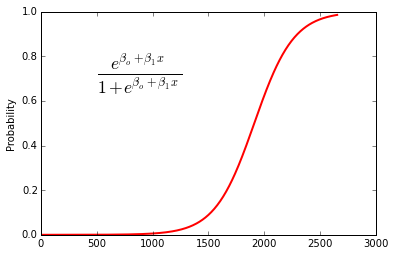

In [132]:
plt.plot(x, y, 'r', linewidth=2)
plt.ylabel('Probability')
plt.text(500, 0.7, r'$\frac{e^{\beta_o + \beta_1x}}{1+e^{\beta_o + \beta_1x}}$', fontsize=25)

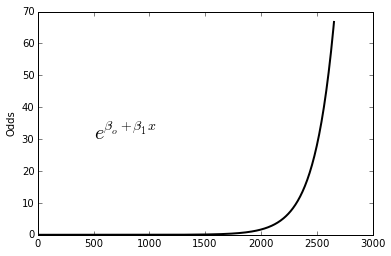

In [129]:
plt.plot(x, odds, 'k', linewidth=2)
plt.ylabel('Odds')
plt.text(500, 30, r'$e^{\beta_o + \beta_1x}$', fontsize=20)


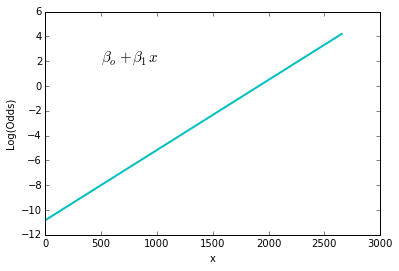

In [133]:
plt.plot(x, log_odds, 'c', linewidth=2)
plt.ylabel('Log(Odds)')
plt.xlabel('x')
plt.text(500, 2, r'$\beta_o + \beta_1x$', fontsize=15)

In [90]:
x_data = pd.DataFrame({'balance': np.linspace(test.balance.min(), 
                                              test.balance.max(),
                                              500)})
y_data = bal.predict(x_data)

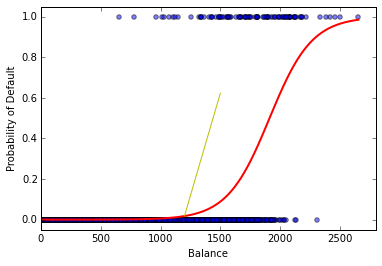

In [131]:
plt.figure()
plt.scatter(test.balance, test.default, alpha=0.5)
plt.plot(x_data, y_data, 'r', linewidth=2)
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.ylim([-0.05,1.05])
plt.xlim([0, 2800])

# Draw default
plt.plot([1200, 1500], prob, 'y')